# Аналитика в авиакомпании

# Шаг 4. Аналитика средствами Python

Описание данных:
model — модель самолета
flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года
city — город
average_flights — среднее количество рейсов, прибывающих в город city за день в августе 2018 года

Импортируем результаты первого запроса и изучим данные

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
query_1 = pd.read_csv(r"/datasets/query_1.csv").sort_values(by=['flights_amount'],ascending = False)
print(query_1.info())
display(query_1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 6 to 4
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes
None


,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


Пропусков данных нет, количество полетов выражено в целочисленных велечинах.Данные корректны.

Импортируем результаты третьего запроса и изучим данные

In [3]:
query_3 = pd.read_csv(r"/datasets/query_3.csv").sort_values(by=['average_flights'],ascending = False)
print(query_3.info())
display(query_3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 43 to 49
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB
None


,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
...,...,...
22,Ижевск,1.000000
65,Петропавловск-Камчатский,1.000000
31,Комсомольск-на-Амуре,1.000000
58,Нягань,1.000000


Пропусков данных нет. Данные о среднем количестве перелетов поданы в вещественном типе. Для удобства округлим эти значения.

In [4]:
query_3['average_flights']=query_3['average_flights'].round(1)
display(query_3)

,city,average_flights
43,Москва,129.8
70,Санкт-Петербург,31.2
54,Новосибирск,17.3
33,Красноярск,11.6
20,Екатеринбург,11.3
...,...,...
22,Ижевск,1.0
65,Петропавловск-Камчатский,1.0
31,Комсомольск-на-Амуре,1.0
58,Нягань,1.0


Проверим нет ли дубликатов в наименовании городов.

In [5]:
query_3.drop_duplicates(subset ="city",keep = 'first', inplace = True) 
display(query_3)

,city,average_flights
43,Москва,129.8
70,Санкт-Петербург,31.2
54,Новосибирск,17.3
33,Красноярск,11.6
20,Екатеринбург,11.3
...,...,...
22,Ижевск,1.0
65,Петропавловск-Камчатский,1.0
31,Комсомольск-на-Амуре,1.0
58,Нягань,1.0


Дупликатов не обнаружено.

Выбирем топ-10 городов по количеству рейсов

In [6]:
query_3_top10=query_3.iloc[0:10]
display(query_3_top10)

,city,average_flights
43,Москва,129.8
70,Санкт-Петербург,31.2
54,Новосибирск,17.3
33,Красноярск,11.6
20,Екатеринбург,11.3
67,Ростов-на-Дону,10.2
63,Пермь,10.1
10,Брянск,10.0
74,Сочи,9.6
84,Ульяновск,9.6


Как и ожидалось, больше всего рейсов в Москву, Питер и региональные центры.

Определим функцию для построения столбчатых диаграмм

In [7]:
def graf(x,y):
    plt.figure(figsize=(20,5))
    sns.set_style("whitegrid")
    height = y
    bars = x
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height)
    plt.xticks(y_pos, bars,rotation=90)
    plt.show()

Построим график: модели самолетов и количество рейсов

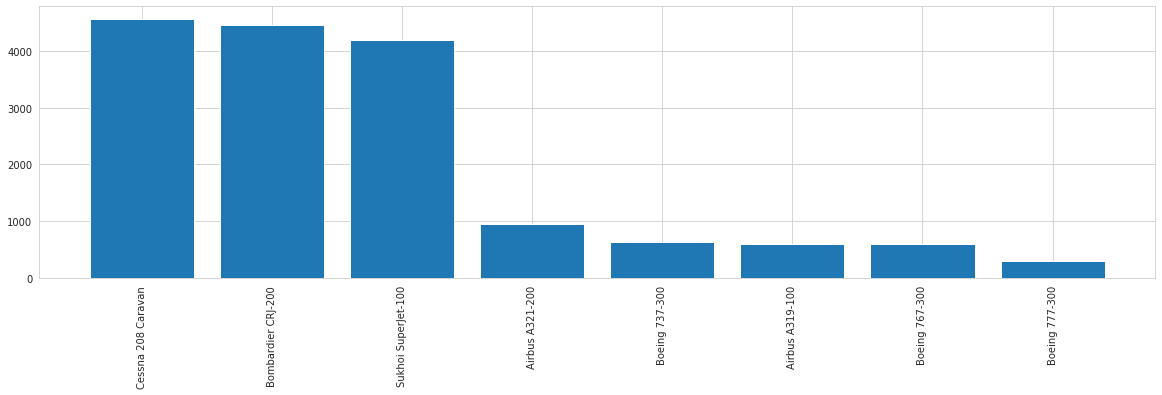

In [8]:
graf(query_1['model'],query_1['flights_amount'])

Построим график: топ-10 городов и количество рейсов

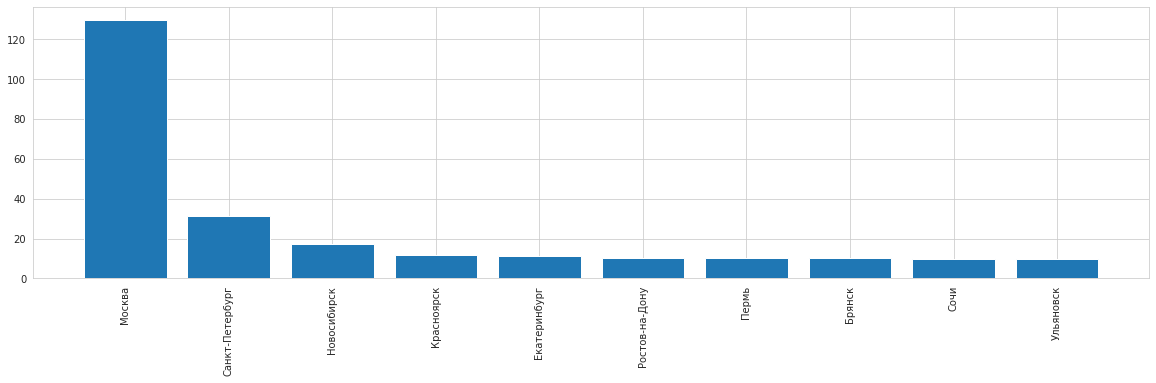

In [9]:
graf(query_3_top10['city'],query_3_top10['average_flights'])

Построим график: города и количество рейсов

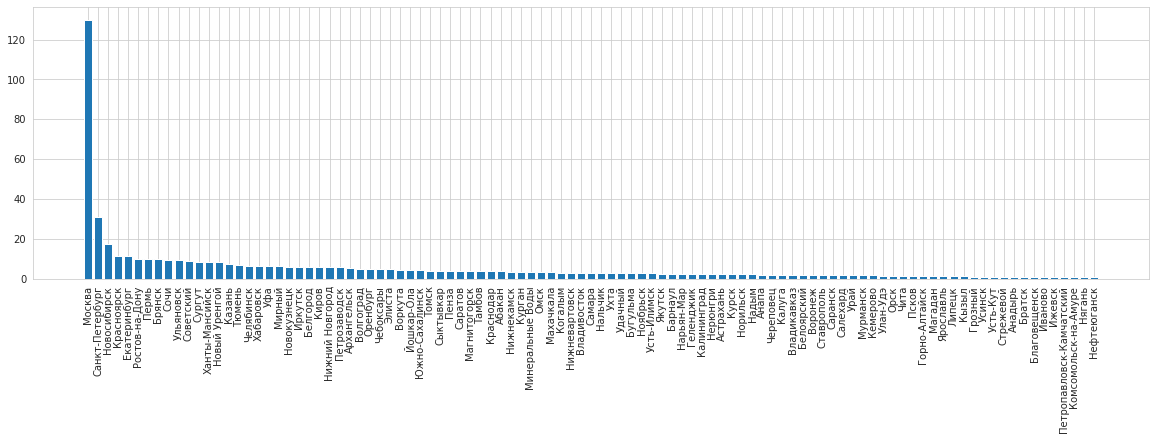

In [10]:
graf(query_3['city'],query_3['average_flights'])

# Вывод

Из предоставленных данных можно сделать вывод, что больше всего авиарейсов ( а в рамках нашего исследования и фестивалей) проводится в крупных мегаполисах : Москве, Санкт-Петербурге и Новосибирске. При этом Москва лидирует с огромным отрывом. Это связано как с большой плотностью населения центрального региона по отношению к другим  районам нашей страны, так и с транспортной доступностью.

Среди моделей самолетов на первых местах: Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. Данная статистика объясняется  экономической целесообразностью эксплуатации именно этих моделей самолетов для регулярных рейсов.